In [1]:
# Extract samples generated from Milestone3_Notebook.ipynb.
!pip install pyspark
!tar -xf sample0.tar.gz
!tar -xf sample1.tar.gz
!tar -xf sample2.tar.gz
!tar -xf sample3.tar.gz
!tar -xf sample4.tar.gz
!tar -xf sample5.tar.gz
!tar -xf sample6.tar.gz

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
try:
  sc.stop()
except:
  pass
sc = SparkContext(master = 'local[3]')
ss = SparkSession(sc)

In [3]:
# Create a dataframe for each sample and show the first one.
dfs = []
dfs.append(ss.createDataFrame(sc.pickleFile('./sample0')))
dfs[0].show(dfs[0].count())

+-----------+--------------------+-----+----------+--------------------+--------------------+--------------------+------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|         ID|               title

In [4]:
# Append dataframes of the other samples.
sample_schema = dfs[0].schema
for i in range(1, 7):
  dfs.append(ss.createDataFrame(sc.pickleFile('./sample' + str(i)),
                                schema = sample_schema))

In [5]:
dfs[1].show(dfs[1].count())

+-----------+--------------------+-----+----------+--------------------+--------------------+--------------------+------------------+-------------+--------------------+--------------------+----------+-----------+--------+------------+-----------------+---------------+-------------------+-------------------+-----------+-------------------+--------------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+-----------------------+-------------------+-------------------+-------------------+-------------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+-------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+-----------------+----------------+--------------+----------------+--------------------+----------+

In [6]:
dfs[2].show(dfs[2].count()) # One sample is NOT a cluster, this one can and
                            # should be ignored.

+---------+--------------------+-----+----------+--------------------+-------+------------+-------------+-----------+-----------+-----------+----------+-----------+--------+------------+-----------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+------------+------------------+-------------------+-----------------------+------------------+----------------+-------------------+------------------+----------------------+-----------------------+---------------------------+-------------------+------------------+-----------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+-----------------+----------------+---------------+----------------+--------------------+----------+
|       ID|               title| rank|      date|              artist|    url|      region|        chart|      trend|   track_id| 

In [7]:
dfs[3].show(dfs[3].count())

+-----------+--------------------+----+--------------+------+----------+--------------------+--------------------+-----+-------------+-------+----------+-----------+--------+--------------+-----------------+---------------+---------+------+-----------+------------------+------------------+---------------+-------------------+-----------+------------------+--------------------+--------------------+-----------------+------------------+-------------------+-----------------------+------------------+----------------+-------------------+------------------+----------------------+-----------------------+---------------------------+-------------------+------------------+--------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+----------------+--------------+----------------+--------------------+----------+
|         ID|               title|rank|          date|artist|       url|           

In [8]:
dfs[4].show(dfs[4].count())

+-----------+-------------------------------+-----+----------+--------------------+--------------------+--------------+-------+-------------+--------------------+------------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+-------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|         ID|             

In [9]:
dfs[5].show(dfs[5].count())

+-----------+--------------------+----+----------+--------------------+--------------------+--------------------+-------+-------------+--------------------+-------------------------+----------+-----------+--------+------------+--------------------+-------------------+-------------------+------+-------------------+-------+--------------------+--------------------+--------------------+-------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+-------------------+----------------+-------------------+------------------+----------------------+-----------------------+---------------------------+-------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|         ID|            

In [10]:
dfs[6].show(dfs[6].count())

+-----------+--------------------+-----+----------+--------------------+--------------------+--------------------+-------+-------------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+-------------------+--------------------+------+-------------------+-------+--------------------+--------------------+-------------------+--------------------+-------------------+------------------+-----------------+------------+------------------+-------------------+-----------------------+--------------------+--------------+-------------------+---------------+----------------------+-----------------------+---------------------------+--------------------+-------------------+------------------+-------------------------+--------------------+--------------------+--------------+-------------+-------------+----------------+----------------+---------------+--------------+----------------+--------------------+----------+
|         ID|               tit

In [11]:
# Unify samples.

all_samples = ss.createDataFrame([], schema = sample_schema)
for i in range(7):
  all_samples = all_samples.union(dfs[i])
all_samples = all_samples.cache()

In [12]:
# Let's refine the above mechanism. For simplicity, we first make a fairly
# reasonable preliminary assumption that the latent variable which the clusters
# seek to describe may be well-parameterized by audio features alone.

from pyspark.sql import functions as F

using_af = [feat for feat in dfs[0].columns if feat == 'prediction' or
 (feat.startswith('af_') and feat.endswith('_imputed'))]
# Get audio feature data, excluding faulty cluster 2.
afeat_df = all_samples.select(using_af).where(F.col('prediction') != 2).toPandas()

In [13]:
afeat_df

,af_danceability_imputed,af_energy_imputed,af_key_imputed,af_loudness_imputed,af_mode_imputed,af_speechiness_imputed,af_acousticness_imputed,af_instrumentalness_imputed,af_liveness_imputed,af_valence_imputed,af_tempo_imputed,af_time_signature_imputed,prediction
0,0.800,0.585,10.0,-7.343,1.0,0.0924,0.264000,0.00000,0.1530,0.779,126.057999,4.0,0
1,0.814,0.645,4.0,-6.232,0.0,0.0439,0.165000,0.01989,0.0925,0.377,125.055000,4.0,0
2,0.861,0.566,1.0,-3.988,1.0,0.2250,0.020300,0.00000,0.0944,0.249,158.169998,4.0,0
3,0.934,0.505,11.0,-7.648,1.0,0.1680,0.022900,0.00000,0.0867,0.691,139.929993,4.0,0
4,0.612,0.769,11.0,-5.695,0.0,0.0290,0.106000,0.01989,0.0404,0.917,139.324997,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.429,0.387,1.0,-7.486,1.0,0.0753,0.259901,0.80200,0.1420,0.410,109.892998,4.0,6
267,0.484,0.749,1.0,-4.176,1.0,0.0687,0.699000,0.86100,0.1050,0.468,160.005997,4.0,6
268,0.704,0.225,6.0,-14.454,0.0,0.0994,0.902000,0.65700,0.1060,0.243,120.005997,4.0,6
269,0.476,0.578,4.0,-9.252,1.0,0.0312,0.108000,0.55800,0.1310,0.298,96.977997,4.0,6


In [14]:
import numpy as np
import pandas as pd

In [15]:
feat_spans = [afeat_df.describe().loc[['min', 'max'], col] for col in
              afeat_df.columns]

In [16]:
hyparam = 10
pd.DataFrame(np.array([np.linspace(item[0], item[1], num = hyparam) for item in
                       np.array(feat_spans, dtype = float)]), index = afeat_df.columns)

,0,1,2,3,4,5,6,7,8,9
af_danceability_imputed,0.09480,22406.195378,44812.295956,67218.396533,89624.497111,112030.597689,134436.698267,156842.798844,179248.899422,201655.000000
af_energy_imputed,0.00609,0.144489,0.282888,0.421286,0.559685,0.698084,0.836483,0.974882,1.113280,1.251679
af_key_imputed,0.00000,1.222222,2.444444,3.666667,4.888889,6.111111,7.333333,8.555556,9.777778,11.000000
af_loudness_imputed,-35.58400,-30.408000,-25.232000,-20.056000,-14.880000,-9.704000,-4.528000,0.648000,5.824000,11.000000
af_mode_imputed,-19.07700,-16.846222,-14.615444,-12.384666,-10.153889,-7.923111,-5.692333,-3.461555,-1.230778,1.000000
af_speechiness_imputed,0.00000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
af_acousticness_imputed,0.00130,0.778933,1.556567,2.334200,3.111833,3.889467,4.667100,5.444733,6.222367,7.000000
af_instrumentalness_imputed,-5.09200,-4.418556,-3.745111,-3.071667,-2.398222,-1.724778,-1.051333,-0.377889,0.295556,0.969000
af_liveness_imputed,0.00000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
af_valence_imputed,0.03480,0.137378,0.239956,0.342533,0.445111,0.547689,0.650267,0.752844,0.855422,0.958000


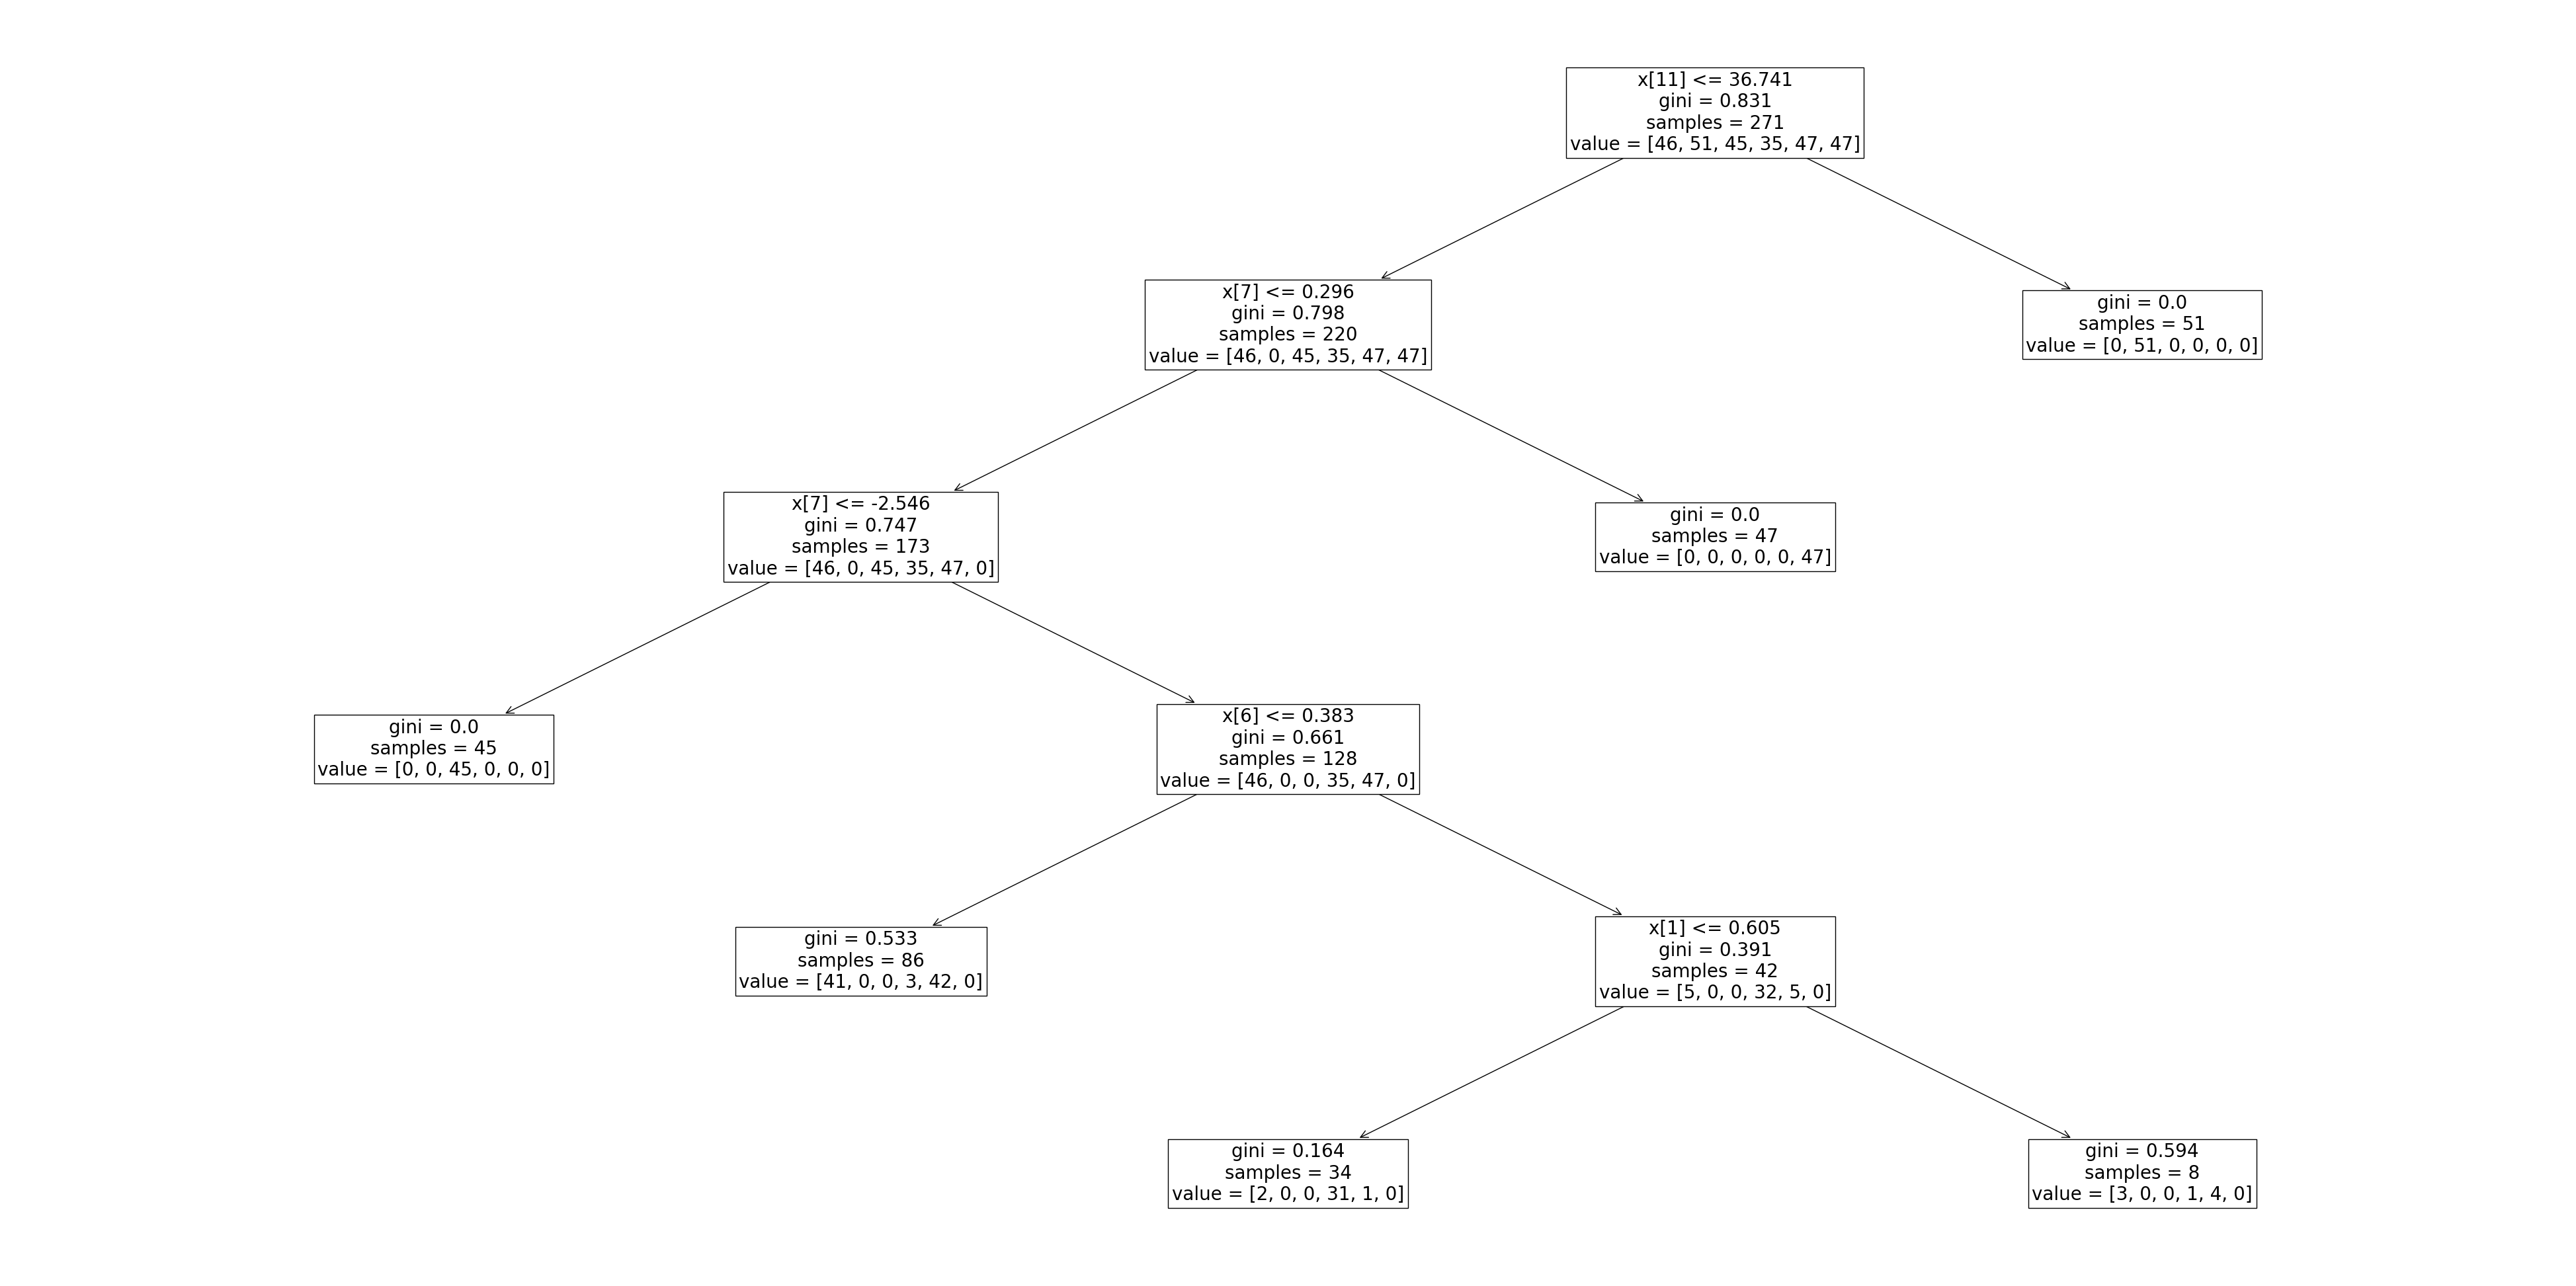

In [17]:
# We can just run a decision tree classifier on our newly machie-labeled sample
# collection and extract a description of it!

import matplotlib.pyplot as plt
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 6).fit(afeat_df.iloc[:, :-1],
                                                          afeat_df.iloc[:, -1])
fig, ax = plt.subplots(1, 1, figsize = (50, 25))
tree.plot_tree(clf, ax = ax, fontsize = 20);

In [18]:
predictions = clf.predict(afeat_df.iloc[:, :-1])
results = pd.DataFrame([predictions == np.array(afeat_df.iloc[:, -1]),
                        np.array(afeat_df.iloc[:, -1])],
                       index = ['predicted', 'actual']).T
for item in results.groupby('actual'):
  print(item[1])

   predicted actual
0      False      0
1      False      0
2      False      0
3      False      0
4      False      0
5      False      0
6      False      0
7      False      0
8      False      0
9      False      0
10     False      0
11     False      0
12     False      0
13     False      0
14     False      0
15     False      0
16     False      0
17     False      0
18     False      0
19     False      0
20     False      0
21     False      0
22     False      0
23     False      0
24     False      0
25     False      0
26     False      0
27     False      0
28     False      0
29     False      0
30     False      0
31     False      0
32     False      0
33     False      0
34     False      0
35     False      0
36     False      0
37     False      0
38     False      0
39     False      0
40     False      0
41     False      0
42     False      0
43     False      0
44     False      0
45     False      0
   predicted actual
46      True      1
47      True      1


From the above, it appears that while cluster 0 describes some miscellaneous theme/category, the other 5 all describe a very specific theme/category. Using the tree plot generated above, we may apply high-level human judgment to try to infer whether our clustering model has successfully extracted any meaningful themes/categories.